In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [97]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [98]:
df.shape

(200, 5)

In [99]:
df.duplicated().sum()

0

In [100]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [101]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [102]:
#checking empty cells if any
df.eq('').sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No null, No duplicates, no blank spaces are present in the dataset till now

As Unnamed:0 column is of no use so we are droping the same

In [103]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [104]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


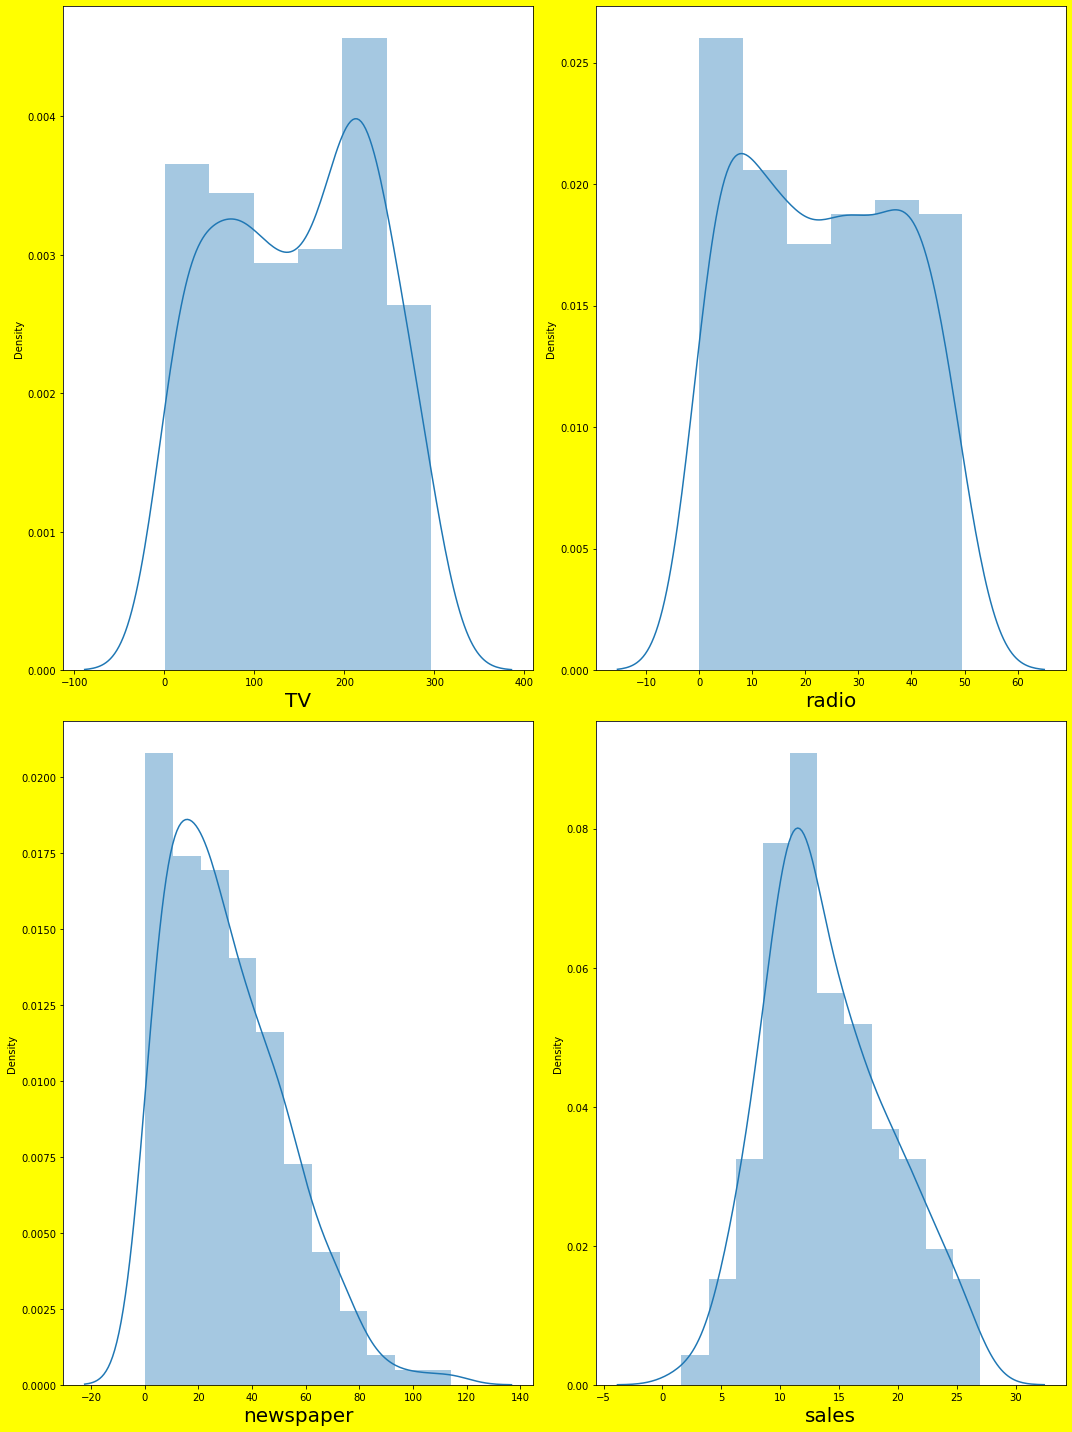

In [105]:
plt.figure(figsize=(15,20), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()

In [106]:
x = df.drop('sales', axis=1)
y = df['sales']

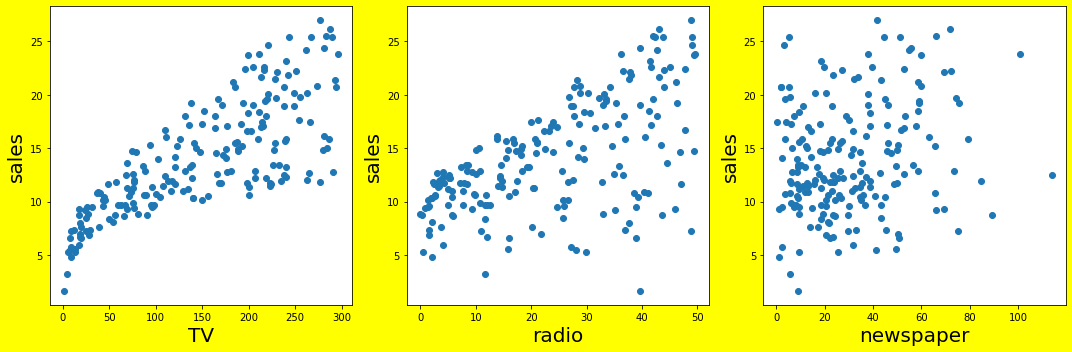

In [107]:
plt.figure(figsize=(15,5), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber <= 4:
        plt.subplot(1,3,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('sales', fontsize=20)
        plotnumber += 1
plt.tight_layout()

We can see Newspaper has not good relation with Sales

Checking outliers

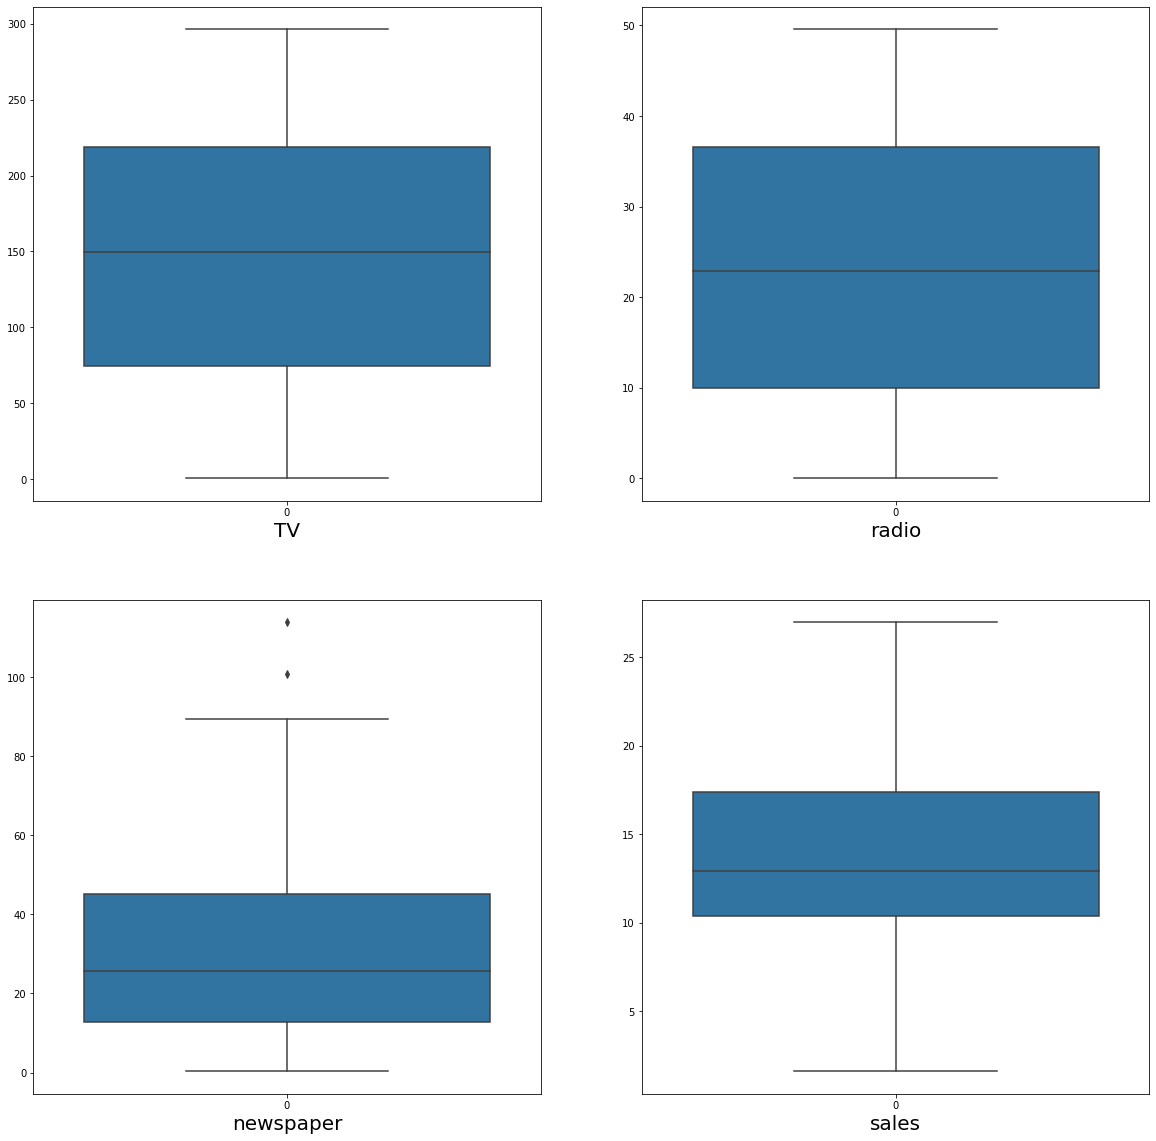

In [108]:
plt.figure(figsize=(20,20))
z=1

for column in df:
    if z <= 4:
        plt.subplot(2,2,z)
        sns.boxplot(data = df[column])
        plt.xlabel(column, fontsize=20)
        z += 1
        
plt.show()
        

No outliers in the data so preprocessing is done, we can create the model now

In [109]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

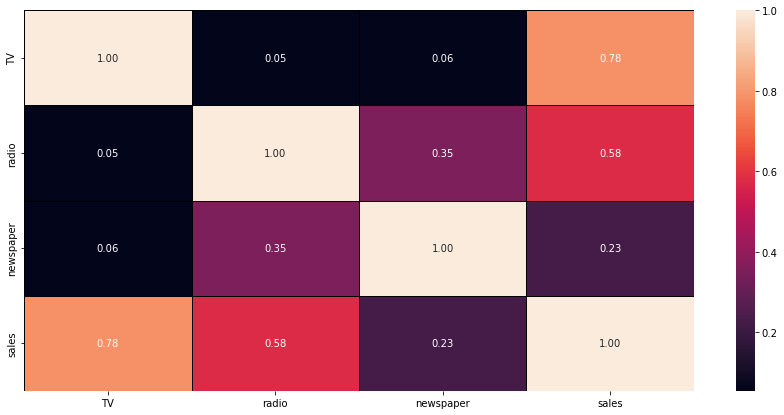

In [110]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='0.2f')

In [112]:
x = df.drop('sales', axis=1)
y = df['sales']

In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.metrics import r2_score
r2=r2_score


# Linear Regression

In [114]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    scr=r2(y_test, y_pred)
    #print('Score', scr, 'random state',i)
    
    
    if scr>maxScore:
        maxScore = scr
        maxRS = i
        #print('Max Score', maxScore, 'Max Random State', maxRS)

print('Max Score', maxScore, 'Max Random State', maxRS)    


Max Score 0.9407274156782428 Max Random State 139


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=139)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9407274156782428


Decision Tree

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=139)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9533089824520181


Random Forest

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=139)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.974377213163872


# Decision Tree

In [118]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    scr=r2(y_test, y_pred)
    #print('Score', scr, 'random state',i)
    
    
    if scr>maxScore:
        maxScore = scr
        maxRS = i
        #print('Max Score', maxScore, 'Max Random State', maxRS)

print('Max Score', maxScore, 'Max Random State', maxRS)    


Max Score 0.9766944420867555 Max Random State 138


In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=138)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9779332166553892


Linear Regression

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=138)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9148095039965507


Random Forest

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=138)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9862358761917722


# Random Forest

In [122]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    scr=r2(y_test, y_pred)
    #print('Score', scr, 'random state',i)
    
    
    if scr>maxScore:
        maxScore = scr
        maxRS = i
        #print('Max Score', maxScore, 'Max Random State', maxRS)

print('Max Score', maxScore, 'Max Random State', maxRS)    


Max Score 0.9884919953803847 Max Random State 156


In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=156)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9892300434721777


Linear Regresson

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=156)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9079628095123551


Decicion Tree

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=156)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9767456041840269


In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=156)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
scr=r2(y_test, y_pred)
print('Score', scr)

Score 0.9884166851876386


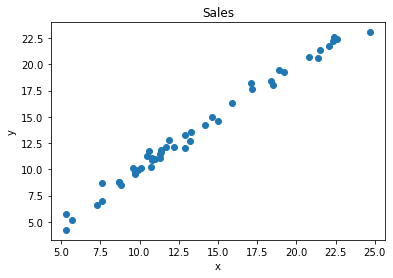

In [130]:
plt.scatter(y_test, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Sales")
plt.show()

# Model Evaluation

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [132]:
mean_absolute_error(y_test, y_pred)

0.41474000000000005

In [133]:
mean_squared_error(y_test, y_pred)

0.2993658600000001

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.547143363297043

# Regularization

In [135]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [136]:
lasscv = LassoCV(alphas=None, max_iter=100, normalize=True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [137]:
alpha = lasscv.alpha_
alpha

0.012283645064238643

In [139]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.012283645064238643)

In [140]:
lasso_reg.score(x_test, y_test)

0.907980883892735

As we can see there is no need of regularization because Random Forest is giving good score